## 1. Imports

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## 2. Caminhos utilizados no fluxo

In [8]:
path = '/home/murilo/workspace/tcc/tcc/python_model/database'
input_path = f'{path}/entrada.csv'
output_path = f'{path}/saida.csv'

## 3. Carregando os arquivos

In [9]:
input_data = pd.read_csv(input_path).drop(columns=['Massa'])
output_data = pd.read_csv(output_path)

Os dados da coluna `massa` foram retirados pois não são podem ser coletadas diretamente.  

## 4. Descrição dos dados

In [10]:
data = pd.concat([input_data, output_data], axis=1)
data.head()

,Na,K,Cl
0,6.2,4.8,12.4
1,14.2,17.2,40.0
2,4.8,3.3,9.5
3,5.4,3.4,10.6
4,5.2,4.3,10.7


In [11]:
correlation_data = data.corr()
descriptive_stats_data = data.describe()

print(descriptive_stats_data) 
print(correlation_data)

               Na           K          Cl
count  198.000000  198.000000  198.000000
mean     8.373232    4.481818   16.545960
std      5.748162    2.713077    9.401413
min      0.900000    0.400000    2.000000
25%      4.700000    2.700000   10.325000
50%      6.700000    3.900000   14.100000
75%     10.700000    5.500000   20.300000
max     37.200000   17.200000   65.500000
          Na         K        Cl
Na  1.000000  0.252614  0.943206
K   0.252614  1.000000  0.480499
Cl  0.943206  0.480499  1.000000


## 5. Data View

In [12]:
sns.set_theme(style="whitegrid")

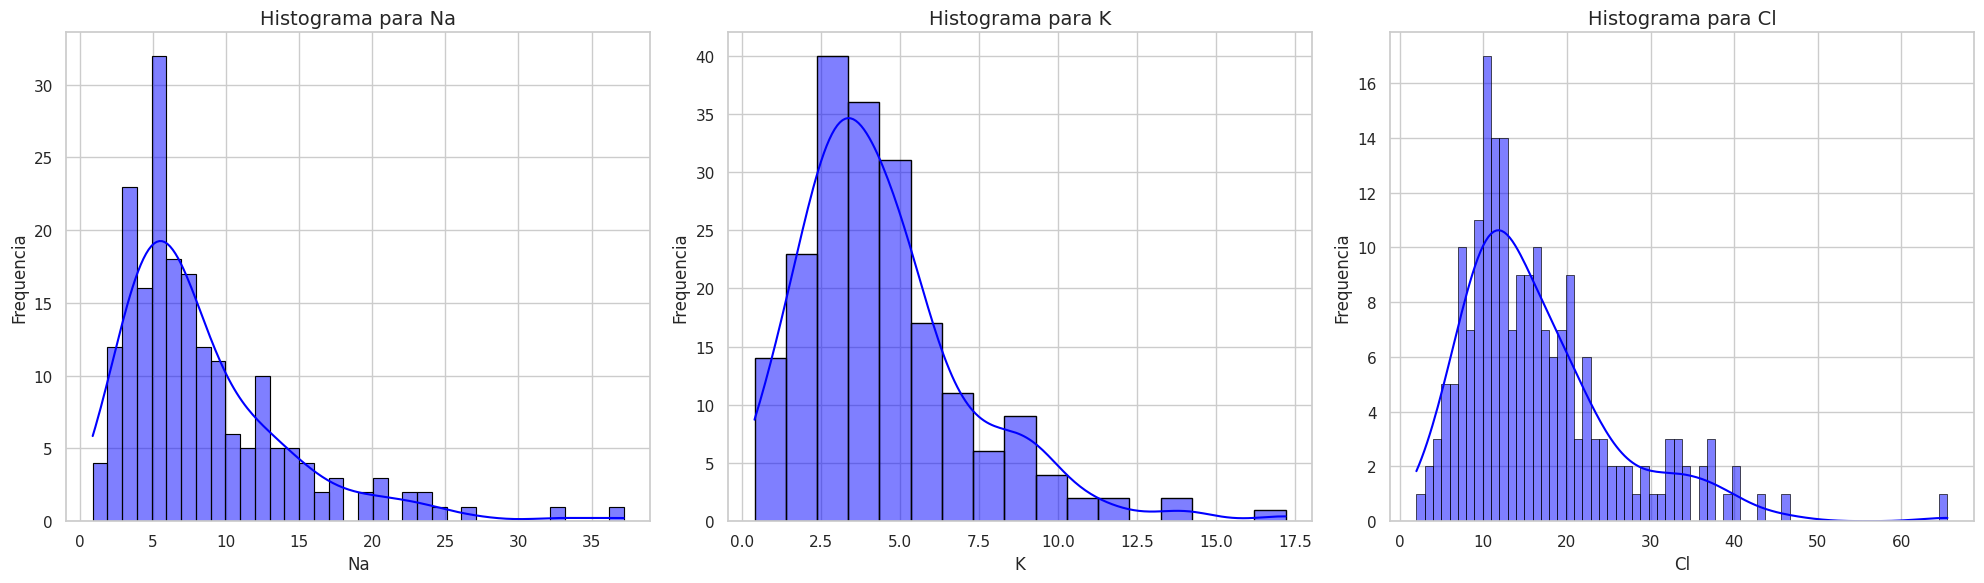

In [13]:
plt.figure(figsize=(20, 6))

for i, column in enumerate(data.columns, 1):
    plt.subplot(1, len(data.columns), i)
    sns.histplot(data[column], kde=True, color='blue', binwidth=1, edgecolor='black')
    plt.title(f'Histograma para {column}', fontsize=14)
    plt.xlabel(f'{column}', fontsize=12)
    plt.ylabel('Frequencia', fontsize=12)

plt.tight_layout()
plt.show()

Com base nas estatísticas descritivas, é possível observar algumas características dos dados que ajudarão a decidir sobre a transformação mais adequada:

### Dados de Entrada (Na e K)
- **Amplitude**: Os valores de Na variam de 0.9 a 37.2 e os de K de 0.4 a 17.2, indicando uma grande amplitude que pode afetar o desempenho do modelo.
- **Distribuição**: A média e a mediana (50%) estão relativamente próximas para ambos os parâmetros, mas o desvio padrão é relativamente alto, especialmente considerando a média, indicando uma dispersão significativa dos dados.
- **Outliers**: A diferença entre o 75% quartil e o valor máximo sugere a presença de outliers, especialmente para Na.

### Dados de Saída (Cl)
- **Amplitude**: Os valores de Cl variam de 2.0 a 65.5, o que é uma faixa bastante ampla.
- **Distribuição**: A média é significativamente maior do que a mediana, o que pode indicar uma distribuição assimétrica com uma cauda longa à direita (presença de outliers).
- **Outliers**: Semelhante aos dados de entrada, a diferença entre o 75% quartil e o valor máximo é bastante grande, indicando outliers.

### Transformações
1. **Transformação Logarítmica**:
   - Pode ser uma boa escolha tanto para os dados de entrada quanto para os de saída, pois ajudará a reduzir a influência de outliers e a normalizar as distribuições, que parecem ser assimétricas e incluem outliers significativos.

2. **Padronização ou Normalização**:
   - Após a transformação logarítmica, aplicar a padronização pode ajudar a garantir que cada feature contribua igualmente para o modelo, o que é útil dado o diferente alcance dos valores em suas características.
   - A normalização (Min-Max Scaling) pode ser considerada se você planeja usar métodos que assumem que os dados estão na mesma escala, como redes neurais.

### Normalização dos dados

In [32]:
dados_entrada_log = np.log1p(input_data)
dados_saida_log = np.log1p(output_data)
scaler = StandardScaler()

In [33]:
dados_entrada_scaled = scaler.fit_transform(dados_entrada_log)

mean = scaler.mean_
var = scaler.var_
scale = scaler.scale_

print('Sódio: ', f'média = {mean[0]} /', f'escala = {scale[0]}')
print('Potássio: ', f'média = {mean[1]} /', f'escala = {scale[1]}')

Sódio:  média = 2.0841135541357527 / escala = 0.54462804093762
Potássio:  média = 1.5888672049282762 / escala = 0.47844564993241423


In [34]:
dados_saida_scaled = scaler.fit_transform(dados_saida_log)

mean = scaler.mean_
var = scaler.var_
scale = scaler.scale_

print('Cloro: ', f'média = {mean[0]} /', f'escala = {scale[0]}')

Cloro:  média = 2.7378255142446153 / escala = 0.504330768563497


de forma que:

- X_new_scaled = (X_new - X_mean) / X_scale
- Y_pred_original_scale = Y_pred_scaled * Y_scale + Y_mean

In [36]:
dados_entrada_scaled = pd.DataFrame(dados_entrada_scaled, columns=input_data.columns)
dados_saida_scaled = pd.DataFrame(dados_saida_scaled, columns=output_data.columns)

In [37]:
data_scaled = pd.concat([dados_entrada_scaled, dados_saida_scaled], axis=1)
data_scaled.head()

,Na,K,Cl
0,-0.202032,0.353208,-0.282693
1,1.169940,2.743372,1.934735
2,-0.599043,-0.272240,-0.766263
3,-0.418296,-0.224190,-0.568715
4,-0.476590,0.164783,-0.551695


In [38]:
correlation_data_scaled = data_scaled.corr()
descriptive_stats_data_scaled = data_scaled.describe()

print(descriptive_stats_data_scaled) 
print(correlation_data_scaled)

                 Na             K            Cl
count  1.980000e+02  1.980000e+02  1.980000e+02
mean  -1.076580e-16  2.377447e-16  4.306320e-16
std    1.002535e+00  1.002535e+00  1.002535e+00
min   -2.648155e+00 -2.617633e+00 -3.250274e+00
25%   -6.309763e-01 -5.863454e-01 -6.163021e-01
50%   -7.875692e-02  7.691578e-04 -4.586429e-02
75%    6.894160e-01  5.913628e-01  6.362522e-01
max    2.861994e+00  2.743372e+00  2.893689e+00
          Na         K        Cl
Na  1.000000  0.260667  0.946886
K   0.260667  1.000000  0.483235
Cl  0.946886  0.483235  1.000000


### Análise das Estatísticas Descritivas

1. **Média Próxima de Zero**: 
   - As médias das variáveis transformadas estão muito próximas de zero. Isso é típico de dados que foram padronizados, indicando que a média foi subtraída de cada valor para centralizar os dados.

2. **Desvio Padrão Próximo de Um**:
   - O desvio padrão (std) das variáveis é próximo de um. Isso mostra que a padronização foi bem-sucedida, pois é característico de dados padronizados terem seu desvio padrão ajustado para um. Isso ajuda a colocar todas as variáveis na mesma escala, facilitando a aprendizagem pelos modelos de machine learning que são sensíveis a escalas diferentes entre os atributos.

3. **Mínimos e Máximos**:
   - Os valores mínimos e máximos após a padronização não são limitados a um intervalo específico como na normalização Min-Max, pois dependem de quão extremos eram os valores originais em relação à média e ao desvio padrão.

4. **Quartis (25%, 50%, 75%)**:
   - Os valores dos quartis mostram a distribuição dos dados em torno da média. O quartil de 50% (mediana) também está próximo de zero, confirmando que a centralização foi aplicada corretamente.

A aplicação de um **Standard Scaler**, que normaliza os dados para terem média zero e desvio padrão unitário, pode ser benéfica em diversos cenários, principalmente em modelos de aprendizado de máquina que são sensíveis à escala das variáveis.

### Vantagens do uso do Standard Scaler:
1. **Eficiência Numérica**: Muitos algoritmos funcionam melhor ou convergem mais rapidamente quando os dados estão em uma escala comum.
2. **Importância Relativa**: Normalizar os dados remove o problema de escalas distintas influenciando mais do que a relevância real daquela variável para o modelo.

Nos dados de treinamento, foi aplicada a $\textbf{Normalização Padrão}$ $\textit{Standard Scaling}$, que é uma técnica comum de pré-processamento para dados de entrada em modelos de aprendizado de máquina. Este método é implementado pela classe $\texttt{StandardScaler}$ da biblioteca $\texttt{sklearn.preprocessing}$:

- Centraliza a Média: Subtrai a média de cada característica, de modo que a média ajustada seja 0.
- Escala pela Variância: Divide cada característica pelo desvio padrão, resultando em uma variância de 1.

A fórmula matemática para a normalização padrão de uma característica $x$ é:

$z = \frac{x - \mu}{\sigma}$

onde $\mu$ é a média e $\sigma$ é o desvio padrão da característica.

Este tipo de normalização é especialmente útil quando as características têm diferentes unidades de medida ou quando há grandes diferenças nas escalas das características, pois coloca todas as características na mesma escala, facilitando o aprendizado e a convergência do modelo.

### Transformação Logarítmica

#### Definição:
A transformação logarítmica é uma operação matemática que aplica o logaritmo natural (logaritmo base e, onde \( e \) é o número de Euler aproximadamente igual a 2.71828) a cada elemento \( x \) de um conjunto de dados. A transformação é definida por:

\[ y = \log(1 + x) \]

onde:
- \( x \) é o valor original (deve ser não-negativo para esta transformação específica).
- \( y \) é o valor transformado.

Esta transformação é especialmente útil para lidar com dados que têm uma distribuição assimétrica com caudas pesadas ou longas, típicas de distribuições log-normais. Ao aplicar o logaritmo, a distribuição dos dados pode se tornar mais simétrica e, em muitos casos, aproxima-se de uma distribuição normal, o que é desejável em muitos modelos de machine learning.

#### Propriedades:
- **Redução de Assimetria**: Torna a distribuição dos dados mais simétrica.
- **Minimização do Impacto de Outliers**: Valores extremamente altos são "reduzidos" mais do que valores mais baixos, o que diminui o efeito de outliers nos dados.
- **Escalabilidade**: Ao transformar, os dados são colocados em uma escala que pode ser mais informativa e menos dispersa.

### Reversão da Transformação Logarítmica

A transformação logarítmica pode ser revertida pela função exponencial menos 1, definida como:

\[ x = \exp(y) - 1 \]

onde:
- \( y \) é o valor logaritmicamente transformado.
- \( x \) é o valor original recuperado.

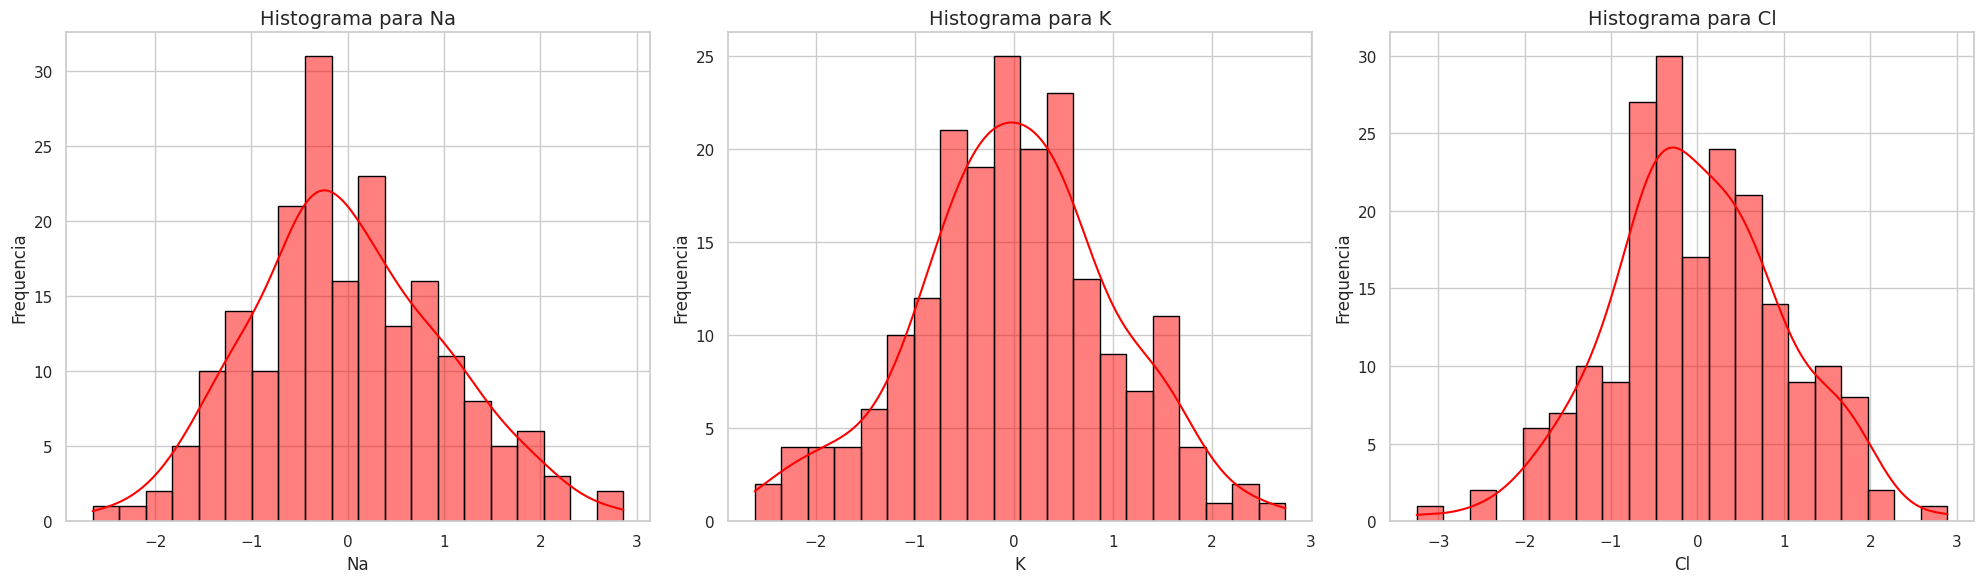

In [40]:
plt.figure(figsize=(20, 6))

for i, column in enumerate(data_scaled.columns, 1):
    plt.subplot(1, len(data_scaled.columns), i)
    sns.histplot(data_scaled[column], kde=True, color='red', bins=20, edgecolor='black')
    plt.title(f'Histograma para {column}', fontsize=14)
    plt.xlabel(f'{column}', fontsize=12)
    plt.ylabel('Frequencia', fontsize=12)

plt.tight_layout()
plt.show()

### Análise dos Histogramas

1. **Na, K, e Cl**:
   - **Distribuição dos Dados**: As distribuições de Na, K e Cl após as transformações parecem mais simétricas e alinhadas em torno do zero. Isso é evidenciado pelos histogramas, que mostram que a maior parte dos dados agora se agrupa em torno da média, que está próxima de zero devido à padronização.
   - **Forma das Distribuições**: Cada histograma exibe uma forma que se aproxima de uma distribuição normal (gaussiana), embora com alguma variação. Por exemplo, K parece ter uma cauda mais longa à direita, sugerindo que ainda existem alguns valores extremos. Cl, por outro lado, tem uma distribuição que parece bem centrada e equilibrada em torno do zero.

### Correlações

- A matriz de correlações indica que existe uma forte correlação entre Na e Cl (0.946886), uma correlação moderada entre K e Cl (0.483235), e uma correlação mais fraca, porém positiva, entre Na e K (0.206667)..

### Implicações para Modelagem

- **Redução de Assimetria e Outliers**: A transformação logarítmica ajuda a minimizar a influência de outliers e reduzir a assimetria, o que pode melhorar a eficácia dos algoritmos de machine learning que pressupõem uma distribuição normal dos dados de entrada.
- **Padronização**: Ao centrar os dados e escalar o desvio padrão para um, a padronização torna os dados mais adequados para algoritmos que são sensíveis à escala das variáveis de entrada, como SVMs, k-NN e redes neurais.

## 6. Base para treino e teste

In [41]:
x_train, x_test, y_train, y_test = train_test_split(dados_entrada_scaled, dados_saida_scaled, test_size=0.30, random_state=42)

In [42]:
x_train.to_csv(f'{path}/x_train.csv', index=False)
x_test.to_csv(f'{path}/x_test.csv', index=False)
y_train.to_csv(f'{path}/y_train.csv', index=False)
y_test.to_csv(f'{path}/y_test.csv', index=False)